In [186]:
from pyforest import *

In [187]:
df_loblaw = pd.read_csv('loblaws.csv')

<IPython.core.display.Javascript object>

In [225]:
df_copy = pd.read_csv('loblaws.csv')

<IPython.core.display.Javascript object>

In [188]:
df_loblaw

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [189]:
df_loblaw.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Duplicates

In [190]:
# Checking for duplicates values
df_loblaw.duplicated().sum()

0

In [191]:
# Dropping CustomerID column
df_loblaw = df_loblaw.drop(['CustomerID','OrderAmountHikeFromlastYear'], axis=1)

In [192]:
df_loblaw

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,0.0,1.0,0.0,121
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,1.0,2.0,NaN,225
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,2.0,2.0,9.0,179


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

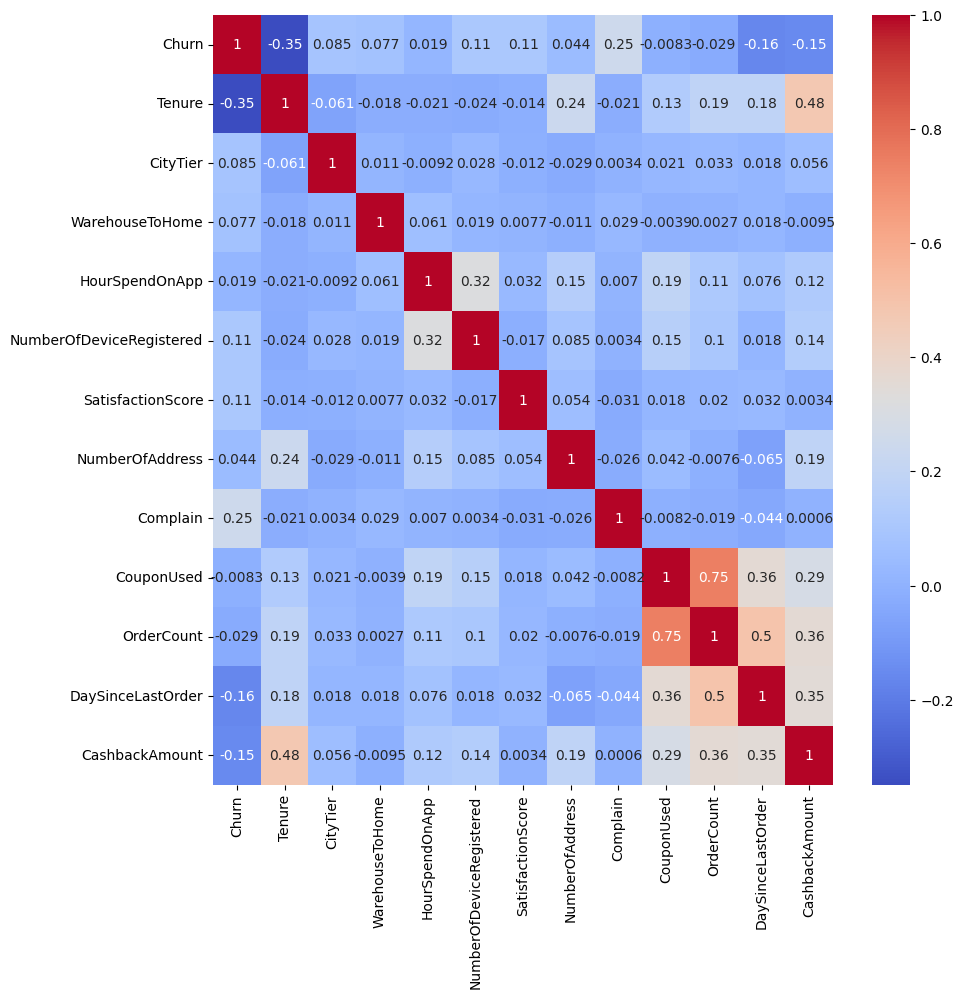

In [193]:
# extracting numerical columns
numerical = df_loblaw.select_dtypes(include=[np.number])

# Correlation matrix
correlation = numerical.corr()

# Heaatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()



Null/Nan Values

In [194]:
# Checking for missing values
df_loblaw.isnull().sum()

Churn                         0
Tenure                      264
PreferredLoginDevice          0
CityTier                      0
WarehouseToHome             251
PreferredPaymentMode          0
Gender                        0
HourSpendOnApp              255
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
CouponUsed                  256
OrderCount                  258
DaySinceLastOrder           307
CashbackAmount                0
dtype: int64

<IPython.core.display.Javascript object>

/var/folders/d8/1m0gxlwj51q9xdbltbjg_grm0000gn/T/ipykernel_79395/2638795562.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loblaw['Tenure'])


<IPython.core.display.Javascript object>

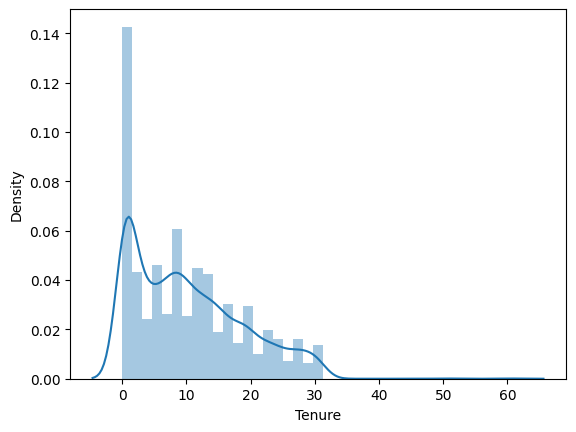

count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64

In [195]:
# Distribution of tenure
sns.distplot(df_loblaw['Tenure'])
plt.show()

df_loblaw['Tenure'].describe()



<IPython.core.display.Javascript object>

/var/folders/d8/1m0gxlwj51q9xdbltbjg_grm0000gn/T/ipykernel_79395/2727518564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loblaw['WarehouseToHome'])


<IPython.core.display.Javascript object>

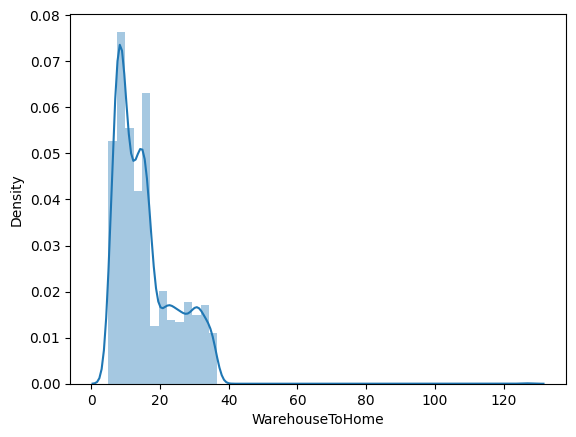

count    5379.000000
mean       15.639896
std         8.531475
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

In [196]:
sns.distplot(df_loblaw['WarehouseToHome'])
plt.show()

df_loblaw['WarehouseToHome'].describe()



<IPython.core.display.Javascript object>

/var/folders/d8/1m0gxlwj51q9xdbltbjg_grm0000gn/T/ipykernel_79395/3653734164.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loblaw['HourSpendOnApp'])


<IPython.core.display.Javascript object>

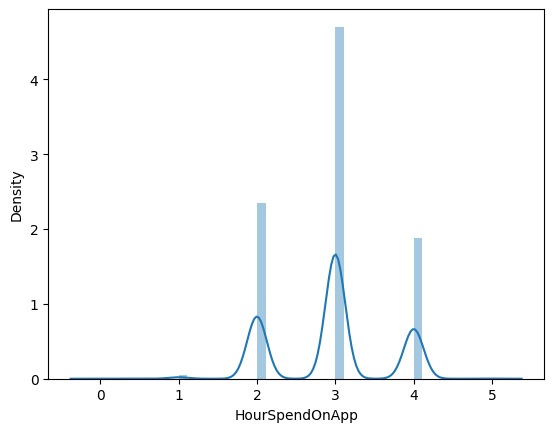

In [197]:
# Replace missing values with the median
df_loblaw['HourSpendOnApp'] = df_loblaw['HourSpendOnApp'].fillna(df_loblaw['HourSpendOnApp'].median())

sns.distplot(df_loblaw['HourSpendOnApp'])
plt.show()

<IPython.core.display.Javascript object>

/var/folders/d8/1m0gxlwj51q9xdbltbjg_grm0000gn/T/ipykernel_79395/3865165915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loblaw['CouponUsed'])


<IPython.core.display.Javascript object>

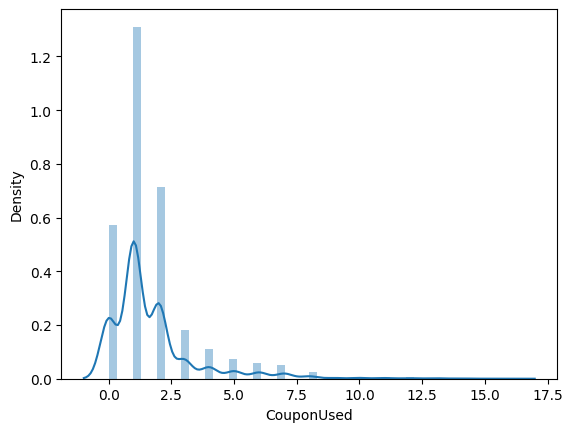

In [198]:
# Replacing missing values with the mode
df_loblaw['CouponUsed'] = df_loblaw['CouponUsed'].fillna(df_loblaw['CouponUsed'].mode()[0])

sns.distplot(df_loblaw['CouponUsed'])
plt.show()


<IPython.core.display.Javascript object>

/var/folders/d8/1m0gxlwj51q9xdbltbjg_grm0000gn/T/ipykernel_79395/1625488749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loblaw['OrderCount'])


<IPython.core.display.Javascript object>

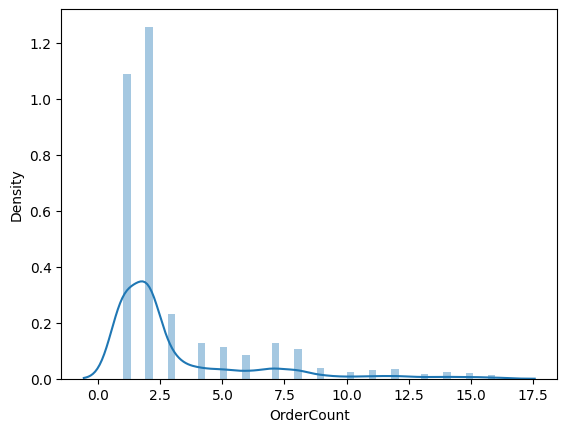

In [199]:
sns.distplot(df_loblaw['OrderCount'])
plt.show()

df_loblaw['OrderCount'].describe()

# Replacing missing values with the median
df_loblaw['OrderCount'] = df_loblaw['OrderCount'].fillna(df_loblaw['OrderCount'].median())


<IPython.core.display.Javascript object>

/var/folders/d8/1m0gxlwj51q9xdbltbjg_grm0000gn/T/ipykernel_79395/2052947140.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loblaw['DaySinceLastOrder'])


<IPython.core.display.Javascript object>

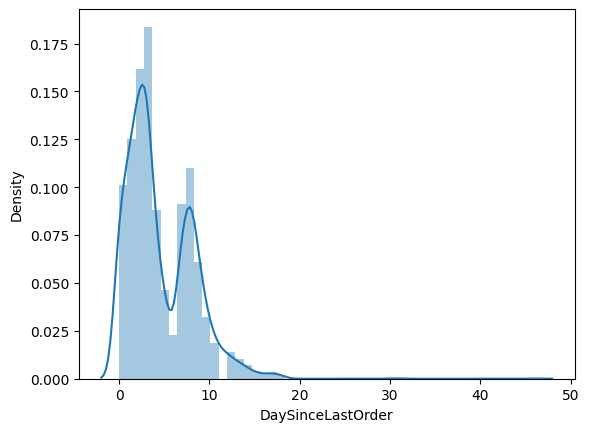

In [200]:
sns.distplot(df_loblaw['DaySinceLastOrder'])
plt.show()

In [201]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

# Handle missing values
imputer = SimpleImputer(strategy='median')  # You can choose mean or most_frequent as well
df_loblaw[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']] = imputer.fit_transform(df_loblaw[['Tenure', 'WarehouseToHome','DaySinceLastOrder']])

# Dealing with skewness
skewed_features = ['Tenure', 'WarehouseToHome','DaySinceLastOrder']
skewed_data = df_loblaw[skewed_features]

# Compute skewness
skewness = skewed_data.skew()

# Apply power transformation to reduce skewness
power_transformer = PowerTransformer(method='yeo-johnson')
df_loblaw[skewed_features] = power_transformer.fit_transform(skewed_data)


In [202]:
df_loblaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     5630 non-null   int64  
 1   Tenure                    5630 non-null   float64
 2   PreferredLoginDevice      5630 non-null   object 
 3   CityTier                  5630 non-null   int64  
 4   WarehouseToHome           5630 non-null   float64
 5   PreferredPaymentMode      5630 non-null   object 
 6   Gender                    5630 non-null   object 
 7   HourSpendOnApp            5630 non-null   float64
 8   NumberOfDeviceRegistered  5630 non-null   int64  
 9   PreferedOrderCat          5630 non-null   object 
 10  SatisfactionScore         5630 non-null   int64  
 11  MaritalStatus             5630 non-null   object 
 12  NumberOfAddress           5630 non-null   int64  
 13  Complain                  5630 non-null   int64  
 14  CouponUs

In [211]:
df_loblaw['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [212]:
# Upsampling the minority class and downsampling the majority class
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_loblaw[df_loblaw['Churn'] == 0]
df_minority = df_loblaw[df_loblaw['Churn'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=1500, random_state=42)

# Downsample majority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=4000, random_state=42)

# Combine majority class with upsampled minority class
df_loblaw = pd.concat([df_majority_downsampled, df_minority_upsampled])

df_loblaw



<IPython.core.display.Javascript object>

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
585,0,-0.257633,3,1.043971,2.0,3,3,2,0,1.0,...,False,False,True,True,False,False,False,False,False,True
3658,0,0.246046,3,0.103416,3.0,2,5,4,0,6.0,...,True,False,False,False,True,False,False,False,False,False
2630,0,1.052884,3,1.604574,3.0,4,4,9,0,1.0,...,False,False,True,False,True,False,False,False,False,True
3338,0,0.352865,3,1.384057,3.0,4,2,7,0,2.0,...,False,False,False,False,False,False,True,False,False,False
4953,0,-1.005467,1,0.964574,3.0,4,3,3,0,1.0,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,1,-1.289642,1,1.190362,4.0,4,1,3,0,2.0,...,False,True,False,False,False,False,True,False,False,True
3518,1,-1.289642,1,0.241202,4.0,4,3,3,0,1.0,...,False,False,True,False,False,False,True,False,False,True
2351,1,0.454157,1,1.701975,3.0,4,5,4,0,0.0,...,False,False,True,False,True,False,False,False,False,True
2034,1,-1.688258,1,-0.600448,3.0,3,5,2,0,1.0,...,False,False,True,False,False,True,False,False,False,True


In [204]:
# Encoding categorical variables
df_loblaw = pd.get_dummies(df_loblaw, drop_first=True)

df_loblaw

<IPython.core.display.Javascript object>

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,-0.582398,3,-1.761459,3.0,3,2,9,1,1.0,...,False,False,False,False,True,False,False,False,False,True
1,1,0.132848,1,-1.095000,3.0,4,3,7,1,0.0,...,False,True,True,False,False,True,False,False,False,True
2,1,0.132848,1,1.499026,2.0,4,3,6,1,0.0,...,False,False,True,False,False,True,False,False,False,True
3,1,-1.688258,3,0.241202,2.0,4,5,8,0,0.0,...,False,False,True,False,True,False,False,False,False,True
4,1,-1.688258,1,-0.212565,3.0,3,5,3,0,1.0,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,0.246046,1,1.499026,3.0,2,1,6,0,1.0,...,False,False,True,False,True,False,False,False,True,False
5626,0,0.550600,1,-0.047100,3.0,5,5,6,0,1.0,...,False,False,True,False,False,False,False,False,True,False
5627,0,-1.289642,1,-0.395799,3.0,2,4,3,1,1.0,...,False,False,True,False,True,False,False,False,True,False
5628,0,1.335897,3,-0.831335,4.0,5,4,4,0,2.0,...,False,False,True,False,True,False,False,False,True,False


In [213]:
# Splitting the data into features and target
X = df_loblaw.drop('Churn', axis=1)
y = df_loblaw['Churn']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [214]:
# Building the model with hyperparameter tuning using RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [215]:
# Best parameters
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [216]:
# Building the model with the best parameters
rf = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features='log2', max_depth=80, bootstrap=True)
rf.fit(X_train, y_train)

# Making predictions
y_pred = rf.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)
feature_importance


[[797  13]
 [ 23 267]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       810
           1       0.95      0.92      0.94       290

    accuracy                           0.97      1100
   macro avg       0.96      0.95      0.96      1100
weighted avg       0.97      0.97      0.97      1100

0.9672727272727273


<IPython.core.display.Javascript object>

,Feature,Importance
0,Tenure,0.238324
1,CashbackAmount,0.091898
2,Complain,0.076785
3,DaySinceLastOrder,0.074763
4,WarehouseToHome,0.069493
5,NumberOfAddress,0.056545
6,SatisfactionScore,0.050853
7,NumberOfDeviceRegistered,0.032909
8,MaritalStatus_Single,0.032389
9,OrderCount,0.030631


In [217]:
# Checking the perfomance on validation set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 95.61 %
Standard Deviation: 0.99 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

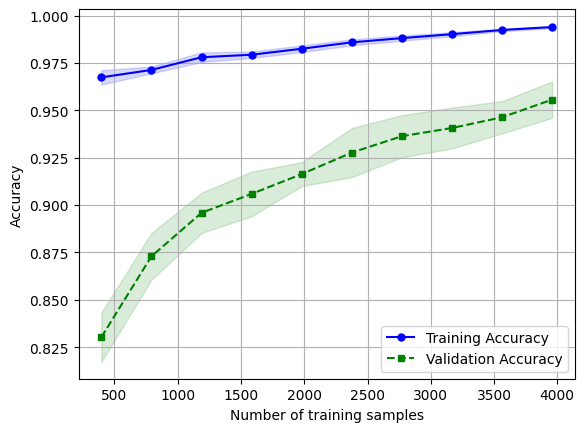

In [218]:
# Visualizing the curves of the model on training and validation sets
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=rf, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [219]:
# Predicting the probability of churn
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# adding the predicted probability to the original dataframe
df_loblaw['Churn_Probability'] = rf.predict_proba(X)[:, 1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [220]:
df_loblaw

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Churn_Probability
585,0,-0.257633,3,1.043971,2.0,3,3,2,0,1.0,...,False,True,True,False,False,False,False,False,True,0.310230
3658,0,0.246046,3,0.103416,3.0,2,5,4,0,6.0,...,False,False,False,True,False,False,False,False,False,0.233655
2630,0,1.052884,3,1.604574,3.0,4,4,9,0,1.0,...,False,True,False,True,False,False,False,False,True,0.188209
3338,0,0.352865,3,1.384057,3.0,4,2,7,0,2.0,...,False,False,False,False,False,True,False,False,False,0.241006
4953,0,-1.005467,1,0.964574,3.0,4,3,3,0,1.0,...,False,True,False,False,False,True,False,True,False,0.380496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,1,-1.289642,1,1.190362,4.0,4,1,3,0,2.0,...,True,False,False,False,False,True,False,False,True,0.589772
3518,1,-1.289642,1,0.241202,4.0,4,3,3,0,1.0,...,False,True,False,False,False,True,False,False,True,0.617899
2351,1,0.454157,1,1.701975,3.0,4,5,4,0,0.0,...,False,True,False,True,False,False,False,False,True,0.333305
2034,1,-1.688258,1,-0.600448,3.0,3,5,2,0,1.0,...,False,True,False,False,True,False,False,False,True,0.562362


In [231]:
# Getting person who has not churned with the highest probability of churn 
df_loblaw[df_loblaw['Churn'] == 0].sort_values('Churn_Probability', ascending=False).head(1)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Churn_Probability
4330,0,-1.289642,1,1.119105,3.0,4,4,2,1,1.0,...,False,True,False,False,False,True,False,True,False,0.809448


In [232]:
df_loblaw[df_loblaw['Churn'] == 0].sort_values('Churn_Probability', ascending=True).head(1)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Churn_Probability
5276,0,1.708782,3,1.654223,3.0,5,1,3,0,1.0,...,False,True,False,False,False,False,True,True,False,0.088817
